### Operators 

DFT Matrix:

\begin{equation}
    \begin{aligned}
    W = \frac{1}{\sqrt{N}}
    \begin{bmatrix}
        1 & 1 & 1 & \cdots & 1\\
        1 & \omega & \omega^2 & \cdots & \omega^{N-1}\\
        1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)}\\
        \vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)(N-1)}
    \end{bmatrix},\\
    \text{where } \omega = e^{-2\pi i/N}\\
    \text{therefore } W_{j,k} = e^{-2\pi i k n/N}
    \end{aligned}
\end{equation}

Using Euler's formula $\omega = e^{-i 2 \pi / 2} = e^{i (-\pi)} = \cos(-\pi) + i\sin(-\pi) = -1$

\begin{equation}
    W_{2} = \frac{1}{\sqrt{2}}   
    \begin{bmatrix}
        1 & 1\\
        1 & -1
    \end{bmatrix}, \text{where }
    \begin{aligned}
        W_{0,0} &= \frac{1}{\sqrt{2}} e^{-i 2 \pi \cdot 0 \cdot 0 / 2} = \frac{1}{\sqrt{2}} \cdot 1 = \frac{1}{\sqrt{2}},\\ 
        W_{0,1} &= \frac{1}{\sqrt{2}} e^{-i 2 \pi \cdot 0 \cdot 1 / 2} = \frac{1}{\sqrt{2}} \cdot 1 = \frac{1}{\sqrt{2}},\\ 
        W_{1,0} &= \frac{1}{\sqrt{2}} e^{-i 2 \pi \cdot 1 \cdot 0 / 2} = \frac{1}{\sqrt{2}} \cdot 1 = \frac{1}{\sqrt{2}},\\
        W_{1,1} &= \frac{1}{\sqrt{2}} e^{-i 2 \pi \cdot 1 \cdot 1 / 2} = \frac{1}{\sqrt{2}} \cdot (-1) = -\frac{1}{\sqrt{2}}. 
\end{aligned}
\end{equation}

\begin{equation}
    \begin{aligned}
        W_{4} = \frac{1}{2}
        \begin{bmatrix}
            1 & 1 & 1 & 1\\
            1 & -i & -1 & i\\
            1 & -1 & 1 & -1\\
            1 & i & -1 & -i
        \end{bmatrix},
    \end{aligned}
\end{equation}

if $\underline{\mathbf{x}}$ is the original signal, $\underline{\mathbf{X}} = W\underline{\mathbf{x}}$ is the DFT of the signal.

Since W is:
- symmetric, $W^H = \overline{W}$
- unitary, $W^H W= I$
- normal $W^H W = W W^H$
- invertible, $W^{-1} = W^H$

The inverse DFT is given by: $\underline{\mathbf{x}} = \overline{W}\underline{\mathbf{X}}$



In [1]:
import numpy as np
# test dft properties
N = 4
# F = dft(N, scale='sqrtn')
F = np.fft.fft(np.eye(N)) / np.sqrt(N)  # Unitary
print(F)
F_T = F.T
F_inv = np.linalg.inv(F)
F_C = F.conj()
F_H = F.conj().T
print(f"is symmetric: {np.allclose(F, F_T)}")
print(f"is symmetric: {np.allclose(F_C, F_H)}")
print(f"is unitary: {np.allclose(F @ F_H, np.eye(N))}")
print(f"is unitary: {np.allclose(F_H @ F, np.eye(N))}")
print(f"is normal: {np.allclose(F @ F_H, F_H @ F)}")
print(f"hermitian equals inverse: {np.allclose(F_H, F_inv)} -> all rows and columns are orthogonal")
print(f"orthogonal: {np.allclose(F @ F_T, np.eye(N))}")
print(f"orthogonal: {np.allclose(F_T @ F, np.eye(N))}")

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5+0.j   0. +0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5+0.j  -0.5+0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j   0. -0.5j]]
is symmetric: True
is symmetric: True
is unitary: True
is unitary: True
is normal: True
hermitian equals inverse: True -> all rows and columns are orthogonal
orthogonal: False
orthogonal: False


The DCT-II matrix can be defined as:

\begin{equation}
    C_{kn} = 
        \begin{cases} 
            \sqrt{\frac{1}{N}} & \text{if } k = 0 \\
            \sqrt{\frac{2}{N}} \cos \left[ \frac{\pi(2n + 1)k}{2N} \right] & \text{if } k \neq 0 
        \end{cases}
\end{equation}

In matrix form:

\begin{equation}
    C = \frac{1}{\sqrt{N}} 
    \begin{bmatrix}
        1 & 1 & 1 & \cdots & 1 \\
        \sqrt{2} \cos(\frac{\pi}{2N}) & \sqrt{2} \cos(\frac{3\pi}{2N}) & \sqrt{2} \cos(\frac{5\pi}{2N}) & \cdots & \sqrt{2} \cos( \frac{(2N-1)\pi}{2N}) \\
        \sqrt{2} \cos(\frac{2\pi}{2N}) & \sqrt{2} \cos(\frac{2 \cdot 3\pi}{2N}) & \sqrt{2} \cos(\frac{2 \cdot 5\pi}{2N}) & \cdots & \sqrt{2} \cos( \frac{2 \cdot (2N-1)\pi}{2N}) \\
        \vdots & \vdots & \vdots & \ddots & \vdots\\
        \sqrt{2} \cos(\frac{(N-1)\pi}{2N}) & \sqrt{2} \cos(\frac{(N-1)3\pi}{2N}) & \sqrt{2} \cos(\frac{(N-1)5\pi}{2N}) & \cdots & \sqrt{2} \cos( \frac{(N-1)(2N-1)\pi}{2N}) \\ 
    \end{bmatrix}
\end{equation}

In [ ]:
from scipy.fftpack import dct, idct
dct_test = dct(np.eye(4), axis=0, norm='ortho')
idct_test = idct(np.eye(4), axis=0, norm='ortho')
print(f"is symmetric: {np.allclose(dct_test, dct_test.T)}")
print(f"is symmetric: {np.allclose(idct_test, idct_test.T)}")
print(f"is unitary: {np.allclose(dct_test @ dct_test.T, np.eye(4))}")
print(f"is unitary: {np.allclose(idct_test @ idct_test.T, np.eye(4))}")
print(f"is normal: {np.allclose(dct_test @ dct_test.T, dct_test.T @ dct_test)}")
print(f"is normal: {np.allclose(idct_test @ idct_test.T, idct_test.T @ idct_test)}")
print(f"orthogonal: {np.allclose(dct_test.T @ dct_test, np.eye(4))}")
print(f"orthogonal: {np.allclose(idct_test.T @ idct_test, np.eye(4))}")

<class 'numpy.float64'>
is symmetric: False
is symmetric: False
is unitary: True
is unitary: True
is normal: True
is normal: True
orthogonal: True
orthogonal: True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.optimize import linprog
from scipy.linalg import dft
from scipy.fftpack import dct, idct
import time
import cvxpy as cvx
from PIL import Image

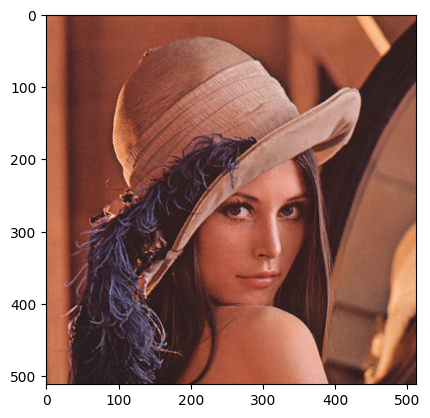

In [ ]:
fname = 'lena.png'
original_image = Image.open(fname)
arr = np.asarray(original_image)
plt.imshow(arr)
plt.show()

Si passa all'immagine in greyscale per evitare di lavorare con un tensore a 3 canali.

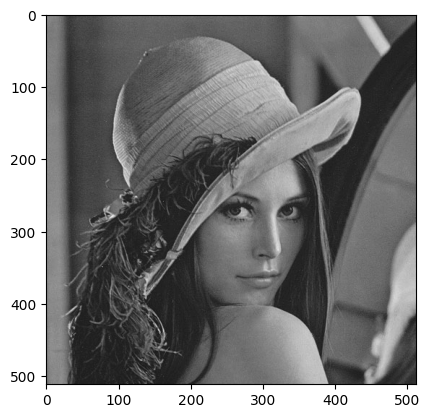

In [ ]:
greyscale_image = Image.open(fname).convert("L")
arr = np.asarray(greyscale_image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

### Test the operators on the First Row

In [ ]:
fft_first_row = np.fft.fft(arr[0])
fft_first_row2 = np.fft.fft(arr2[0])
fft_first_row_shifted = np.fft.fftshift(fft_first_row)

dct_first_row = dct(arr[0], norm='ortho')
dct_first_row2 = dct(arr2[0], norm='ortho')

NameError: name 'arr2' is not defined

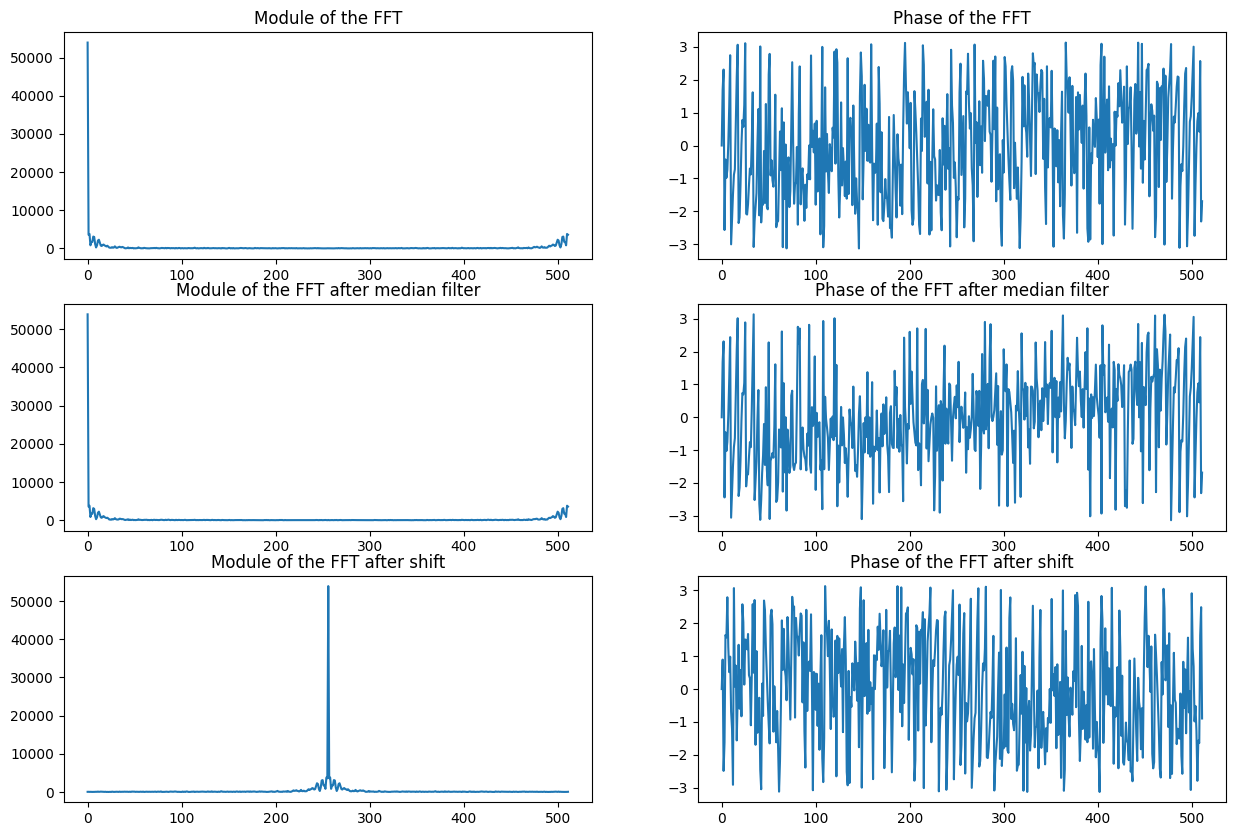

In [ ]:
# plot the module and the phase of the fft
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.plot(np.abs(fft_first_row))
plt.title("Module of the FFT")
plt.subplot(3, 2, 2)
plt.plot(np.angle(fft_first_row))
plt.title("Phase of the FFT")
plt.subplot(3, 2, 3)
plt.plot(np.abs(fft_first_row2))
plt.title("Module of the FFT after median filter")
plt.subplot(3, 2, 4)
plt.plot(np.angle(fft_first_row2))
plt.title("Phase of the FFT after median filter")
plt.subplot(3, 2, 5)
plt.plot(np.abs(fft_first_row_shifted))
plt.title("Module of the FFT after shift")
plt.subplot(3, 2, 6)
plt.plot(np.angle(fft_first_row_shifted))
plt.title("Phase of the FFT after shift")
plt.show()

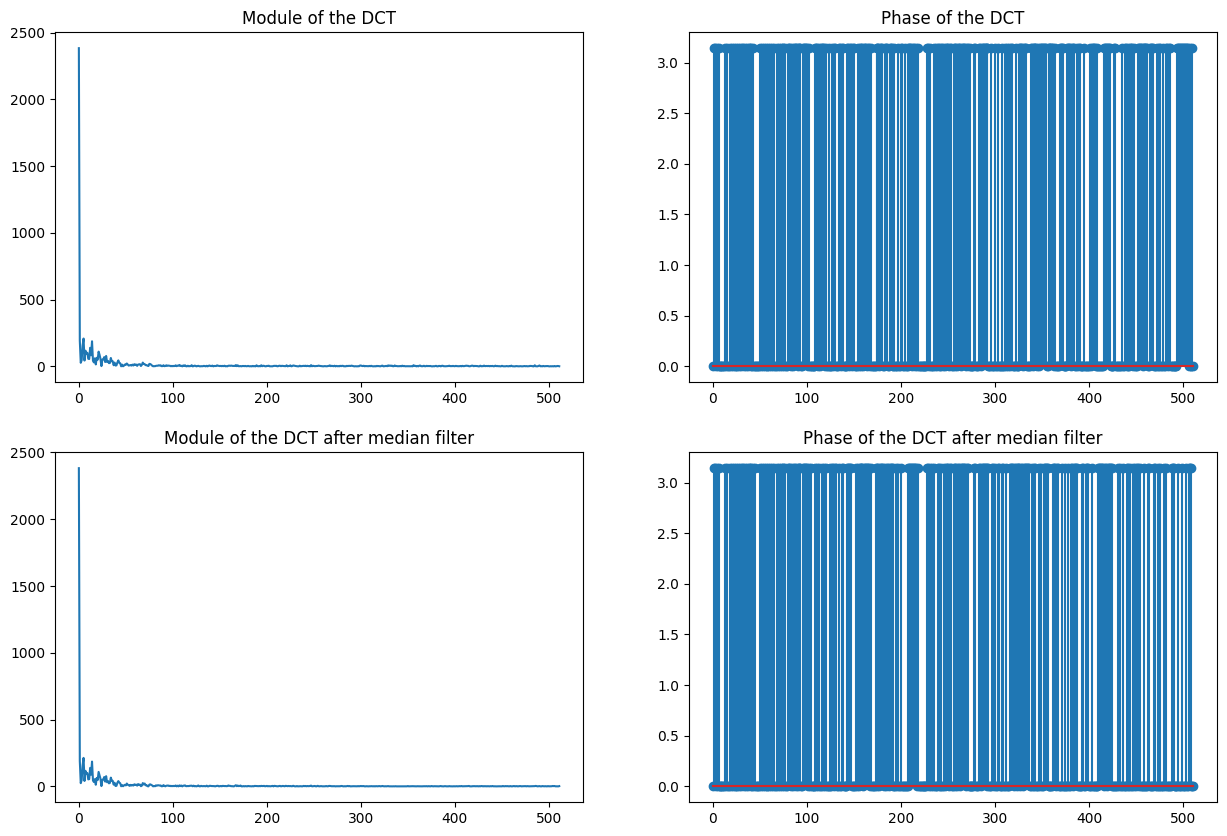

In [ ]:
# plot the dct
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(np.abs(dct_first_row))
plt.title("Module of the DCT")
plt.subplot(2, 2, 2)
plt.plot(np.angle(dct_first_row))
plt.title("Phase of the DCT")
plt.subplot(2, 2, 3)
plt.plot(np.abs(dct_first_row2))
plt.title("Module of the DCT after median filter")
plt.subplot(2, 2, 4)
plt.plot(np.angle(dct_first_row2))
plt.title("Phase of the DCT after median filter")
plt.show()

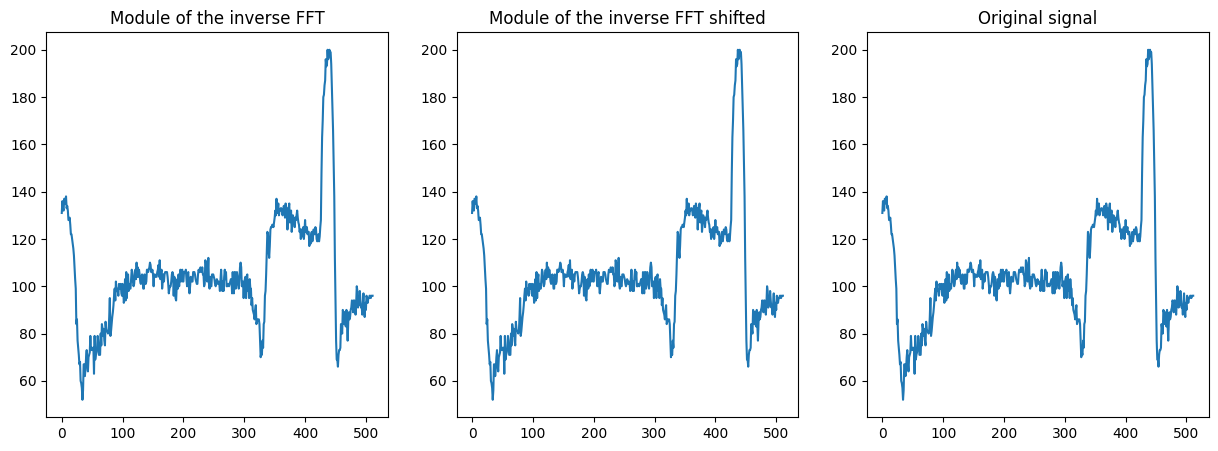

In [ ]:
# apply the inverse fft
inverse_fft_first_row = np.fft.ifft(fft_first_row)
inverse_fft_shifted_first_row = np.fft.ifft(fft_first_row_shifted)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(np.abs(inverse_fft_first_row))
plt.title("Module of the inverse FFT")
plt.subplot(1, 3, 2)
plt.plot(np.abs(inverse_fft_shifted_first_row))
plt.title("Module of the inverse FFT shifted")
plt.subplot(1, 3, 3)
plt.plot(arr[0])
plt.title("Original signal")
plt.show()

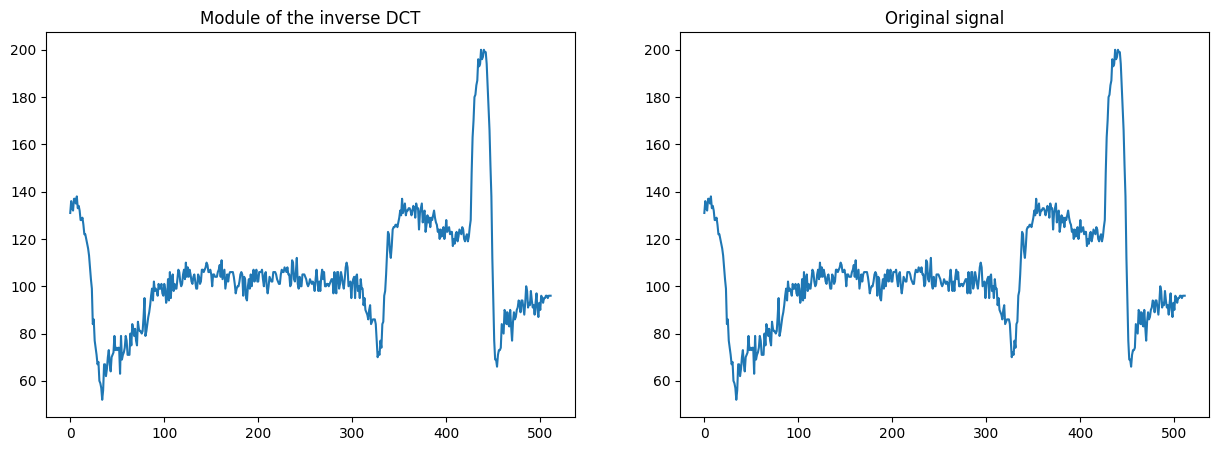

In [ ]:
# apply the inverse dct
inverse_dct_first_row = idct(dct_first_row, norm='ortho')
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(inverse_dct_first_row))
plt.title("Module of the inverse DCT")
plt.subplot(1, 2, 2)
plt.plot(arr[0])
plt.title("Original signal")
plt.show()

###  Optimization problem

Linear program:

\begin{equation}
    \begin{aligned}
        \min_{\underline{\mathbf{x}}} & \quad \underline{\mathbf{c}}^T \underline{\mathbf{x}} + d\\
        
        \text{s.t.} & \quad A\underline{\mathbf{x}} = \underline{\mathbf{b}},\\
        & \quad G\underline{\mathbf{x}} \leq \underline{\mathbf{h}}
    \end{aligned}
\end{equation}

Basis Pursuit:

\begin{equation}
    \begin{aligned}
        \min_{\underline{\mathbf{x}}} & \quad ||\underline{\mathbf{x}}||_1\\
        
        \text{s.t.} & \quad \theta\underline{\mathbf{x}} = \underline{\mathbf{y}}
    \end{aligned}
\end{equation}

L1 norm:
$||\underline{\mathbf{x}}||_1 = \sum_i |x_i|$,

From the contraint:
$x_i = x_i^{+} - x_i^{-}$, where $x_i^{+} = \max\{x_i, 0\}$, $x_i^{-} = \max\{-x_i, 0\}$, $x_i^{+}, x_i^{-} \geq 0 \implies |x_i| = x_i^{+} + x_i^{-}$

Then:
$||\underline{\mathbf{x}}||_1 = 
    \begin{bmatrix}
        \underline{\mathbf{1}}^{T} & \underline{\mathbf{1}}^{T}
    \end{bmatrix}
    \begin{bmatrix}
        \underline{\mathbf{x}}^{+}\\
        \underline{\mathbf{x}}^{-}
    \end{bmatrix} \implies$,
$A = 
    \begin{bmatrix}
        \theta \\
        -\theta
    \end{bmatrix}$,
$\underline{\mathbf{b}} = y$,
$\underline{\mathbf{c}} = \underline{\mathbf{1}}_{2N}$,
$d = 0$

\begin{equation}
    \begin{aligned}
        \min_{\underline{\mathbf{x}}^{+}, \underline{\mathbf{x}}^{-}} & \quad 
        \begin{bmatrix}
            \underline{\mathbf{1}}^{T} & \underline{\mathbf{1}}^{T}
        \end{bmatrix} 
        \begin{bmatrix}
            \underline{\mathbf{x}}^{+}\\
            \underline{\mathbf{x}}^{-}
        \end{bmatrix} \\
        \text{s.t.} & \quad \theta(\underline{\mathbf{x}}^{+} - \underline{\mathbf{x}}^{-}) = \underline{\mathbf{y}}\\
        & \quad \underline{\mathbf{x}}^{+}, \underline{\mathbf{x}}^{-} \succcurlyeq 0
    \end{aligned}
\end{equation}

From the SciPy.optimize.linprog documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) the linear program is defined as:

\begin{equation}
    \begin{aligned}
        \min_{\underline{\mathbf{x}}} & \quad \underline{\mathbf{c}}^T \underline{\mathbf{x}}\\
        \text{s.t.} & \quad A_{ub} \underline{\mathbf{x}} \leq \underline{\mathbf{b}}_{ub},\\
        & \quad A_{eq} \underline{\mathbf{x}} = \underline{\mathbf{b}}_{eq},\\
        & \quad l \leq \underline{\mathbf{x}} \leq u
    \end{aligned}
\end{equation}

**linprog(**__*c*__, ***A_ub***_=None_, ***b_ub***_=None_, ***A_eq***_=None_, ***b_eq***_=None_, ***bounds***_=(0, =None)_, ***method***_='highs'_, ***callback***_=None_, ***options***_=None_, ***x0***_=None_, ***integrality***_=None_)

Parameters:
- **c:** ***(1-D array)*** The coefficients of the linear objective function to be minimized.
- **A_ub:** ***(2-D array, optional)*** The inequality constraint matrix. Each row of `A_ub` specifies the coefficients of a linear inequality constraint on `x`.
- **b_ub:** ***(1-D array, optional)*** The inequality constraint vector. Each element represents an upper bound on the corresponding value of `A_ub @ x`.
- **A_eq:** ***(2-D array, optional)*** The equality constraint matrix. Each row of `A_eq` specifies the coefficients of a linear equality constraint on `x`.
- **b_eq:** ***(1-D array, optional)*** The equality constraint vector. Each element of `A_eq @ x` must equal the corresponding element of `b_eq`.
- **bounds:** ***(sequence, optional)*** A sequence of `(min, max)` pairs for each element in `x`, defining the minimum and maximum values of that decision variable. If a single tuple `(min, max)` is provided, then `min` and `max` will serve as bounds for all decision variables. Use `None` to indicate that there is no bound. For instance, the default bound `(0, None)` means that all decision variables are non-negative, and the pair `(None, None)` means no bounds at all, i.e. all variables are allowed to be any real.


In [ ]:
def solve_basis_pursuit_lp(A, B) -> np.ndarray:
    num_rows, num_cols = A.shape

    C = np.ones(2 * num_cols)

    # hstack is equivalent to concatenate along the second axis, except for 1-D arrays where it concatenates along the first axis.
    A_eq = np.hstack((A, -A)) 
    B_eq = B

    LowerBound = np.zeros(2 * num_cols)
    UpperBound = np.full(2 * num_cols, np.inf)

    result = linprog(C, A_eq=A_eq, b_eq=B_eq, bounds=list(zip(LowerBound, UpperBound)), method='highs', options={'disp': False})

    if result.success:
        X = result.x[:num_cols] - result.x[num_cols:]
        return X
    else:
        raise ValueError("Linear programming did not converge")

Example:

$\begin{bmatrix}
    1 & 2\\
    3 & 4
\end{bmatrix} \underline{\mathbf{x}} = 
\begin{bmatrix}
    1\\
    1
\end{bmatrix}$
$\implies$
$\begin{cases}
    x_1 + 2x_2 = 1\\
    3x_1 + 4x_2 = 1
\end{cases}$
$\implies$
$\begin{cases}
    x_1 = 1 - 2x_2\\
    3(1 - 2x_2) + 4x_2 = 1
\end{cases}$
$\implies$

$\implies$
$\begin{cases}
    x_1 = 1 - 2x_2\\
    3 - 2x_2 = 1
\end{cases}$
$\implies$
$\begin{cases}
    x_1 = -1\\
    x_2 = 1
\end{cases}$


In [ ]:
# Test basis pursuit implementation
mA = np.array([[1, 2], [3, 4]])
vB = np.array([1, 1])
vX = solve_basis_pursuit_lp(mA, vB)
print(vX)

[-1.  1.]


### Compressive Sampling

\begin{equation}
    \begin{aligned}
        \arg \min_{\underline{\mathbf{s_{i}}}} & \quad ||\underline{\mathbf{s_{i}}}||_1\\
        \text{s.t.} & \quad \underline{\mathbf{y_{i}}} = \Phi_{i} F_{N} \underline{\mathbf{s_{i}}} 
    \end{aligned}
\end{equation}

where $\underline{\mathbf{y_{i}}}$ is the $i$-th undersampling of the signal, in this case either a row or an image

One way of solving this is problem uses the Kronecker product:

\begin{equation}
    \begin{aligned}
        vec (X) \in R^{N^2} = \underline{\mathbf{x}} = 
        \begin{bmatrix}
            C_{N} & 0 & \cdots & 0 \\
            0 & C_{N} & \cdots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0  & 0 & \cdots & C_{N}
        \end{bmatrix}
        \begin{bmatrix}
            \underline{\mathbf{s_{1}}} \\
            \underline{\mathbf{s_{2}}} \\
            \vdots \\
            \underline{\mathbf{s_{N}}}
        \end{bmatrix} =

        (I_{N} \otimes C_{N})\underline{\mathbf{s}} = 
        \begin{bmatrix}
            1 \cdot C_{N} & 0 \cdot C_{N} & \cdots & 0 \cdot C_{N} \\
            0 \cdot C_{N} & 1 \cdot C_{N} & \cdots & 0 \cdot C_{N} \\
            \vdots & \vdots & \ddots & \vdots \\
            0 \cdot C_{N} & 0 \cdot C_{N} & \cdots & 1 \cdot C_{N}
        \end{bmatrix}
        \begin{bmatrix}
            \underline{\mathbf{s_{1}}} \\
            \underline{\mathbf{s_{2}}} \\
            \vdots \\
            \underline{\mathbf{s_{N}}}
        \end{bmatrix}
    \end{aligned}
\end{equation},

where 
$ 
\begin{bmatrix}
    1 \cdot C_{N} & 0 \cdot C_{N} & \cdots & 0 \cdot C_{N} \\
    0 \cdot C_{N} & 1 \cdot C_{N} & \cdots & 0 \cdot C_{N} \\
    \vdots & \vdots & \ddots & \vdots \\
    0 \cdot C_{N} & 0 \cdot C_{N} & \cdots & 1 \cdot C_{N}
\end{bmatrix} = 
\begin{bmatrix}
    1 \cdot C_{1,1} & \cdots & 1 \cdot C_{1,N} & \cdots & \cdots & 0 \cdot C_{1,1} & \cdots & 0 \cdot C_{1,N} \\
    \vdots & \ddots & \vdots & & & & \ddots & \vdots \\
    1 \cdot C_{N,1} & \cdots & 1 \cdot C_{N,N} & \cdots & \cdots &0 \cdot C_{N,1} & \cdots & 0 \cdot C_{N,N} \\
    \vdots & & \vdots & \ddots & & \vdots & & \vdots \\
    \vdots & & \vdots & & \ddots & \vdots & & \vdots \\
    0 \cdot C_{1,1} & \cdots & 0 \cdot C_{1,N} & \cdots & \cdots & 1 \cdot C_{1,1} & \cdots & 1 \cdot C_{1,N} \\
    \vdots & \ddots & \vdots & & & \vdots & \ddots & \vdots \\
    0 \cdot C_{N,1} & \cdots & 0 \cdot C_{N,N} & \cdots & \cdots  & 1 \cdot C_{N,1} & \cdots & 1 \cdot C_{N,N} \\
\end{bmatrix}
$

This way all the rows or the columns of the image are stacked in a single vector, and the Kronecker product is used to apply the DCT to each row or column of the image. Since the identity matrix $\in R^{n \times n}$ and the DCT matrix $\in R^{n \times n}$, the resulting kronecker matrix $\in R^{n^2 \times n^2}$.

Since $\underline{\mathbf{y_{i}}}$ is the $i$-th undersampling of the signal, we can write:
\begin{equation}
    \begin{aligned}
        vec (Y) = \underline{\mathbf{y}} = 
        \begin{bmatrix}
            \underline{\mathbf{y_{1}}} \\
            \underline{\mathbf{y_{2}}} \\
            \vdots \\
            \underline{\mathbf{y_{N}}}
        \end{bmatrix} = 
        \begin{bmatrix}
            \Phi_{1} C_{N} & 0 & \cdots & 0 \\
            0 & \Phi_{2} C_{N} & \cdots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0  & 0 & \cdots & \Phi_{N} C_{N}
        \end{bmatrix}
        \begin{bmatrix}
            \underline{\mathbf{s_{1}}} \\
            \underline{\mathbf{s_{2}}} \\
            \vdots \\
            \underline{\mathbf{s_{N}}}
        \end{bmatrix}
    \end{aligned}
\end{equation}

This way the kronecker product has a reduced size of $R^{m^2 \times n^2}$.

For $n = 2^9$, $m = 2^6$(1/8 of the samples) and a data type of double(64 bit), the resulting matrix will be $R^{2^{12} \times 2^{18}}$ with a memory occupation of $2^{12} \cdot 2^{18} \cdot 8 = 2^{32} = 4GB$.
for practical reasons, the problem is instead solved by iterating over each row/column individually using a for cycle  and solving the L1 optimization problem.